# Nota de Estudo — Sistema de Resfriamento onde ar passa por uma serpentina resfriada com água
### Solução de Sistema Não-Linear

**Autor:** Francisco Sotero ([francisco.sotero@ufpe.br](mailto:francisco.sotero@ufpe.br))  
Laís de Moura ([lais.rodrigues@ufpe.br](mailto:lais.rodrigues@ufpe.br))  
**Curso:** Engenharia Mecânica — UFPE  
**Início do desenvolvimento:** 13/10/2025  
**Primeira publicação:** 10/2025  
**Versão atual:** *(teste técnico no Colab, teste didático-pedagógico)*  

---
# Representação visual do sistema estudado



---

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/sistema-de-resfriamento-6-14.png"
       alt="Sistema de Resfriamento"
       width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Sistema de Resfriamento (Prob. 6-14 do Stoecker).</figcaption>
</figure>

# 1. Objetivo e Referência

**Objetivo:**  
Analisar o funcionamento de um sistema de resfriamento onde ar passa por uma serpentina resfriada por água. O objetivo é determinar como variáveis como vazão, temperatura e pressão se relacionam e influenciam a eficiência do sistema.  
*(Estudo ampliado do Problema 6-14 de Stoecker).*

**Referência:**  
Stoecker, W. F. *Design of Thermal Systems*, cap. 6, 3ª ed., McGraw-Hill, 1989.

---

## Estrutura do Notebook

1. Enunciado do problema  
2. Modelagem matemática  
3. Solução numérica  
4. Estudo paramétrico  
5. Redução no número de equações  
6. Propriedades reais
7. Considerações finais

---

# 1. Sistema Térmico – Resumo Técnico

---

## 1.1 Dados do Sistema

- **UA:** 7 kW/K  
- **$C_{p,ar}$:** 1 kJ/kg·K  
- **C_{p,água}$:** 4,18 kJ/kg·K  
- **Vazão de ar ($w_a$):** 4 kg/s  
- **Temperatura do ar na entrada ($T_{ar,in}$):** 28 °C  
- **Temperatura da água:** 36 °C  
- **Área específica ($G_a$):** 1 kg/s·m²  

---

## 1.2 Equações Principais

### (a) Troca de Calor
$$
Q = w_w \cdot C_p \cdot (T_a - T_s) \tag{1}
$$

$$
Q = w_w \cdot C_p \cdot (T_4 - T_3) \tag{2}
$$

$$
Q = UA \cdot \Delta T_{lm} \tag{3}
$$

---

### (b) Diferença de Pressão
$$
\Delta P = P_2 - P_1 = 120000 - \left(\frac{w}{Cv}\right)^2 \tag{4}
$$

$$
P_2 - P_3 = \left(\frac{w}{c_v}\right)^2 \tag{5}
$$

$$
P_3 - P_4 = \left(9260 \cdot \frac{w}{c_v}\right)^2 \tag{6}
$$

---

### (c) Coeficiente da Válvula
$$
C_v = 0.006 \cdot T_{ar,out} - 0.06 \tag{7}
$$

---

# 2. Enunciado do problema

O ar a $28°C$, com vazão de $4$ $kg/s$, escoa através de uma serpentina de resfriamento em contracorrente com água fria que entra a $6°C$, conforme mostrado na *Fig. 6-23*.  
O ar possui calor específico:

$$
c_p = 1,0 \left[\frac{kJ}{kg·K}\right]
$$

Não ocorre desumidificação do ar ao passar pela serpentina.  
O produto da área pelo coeficiente de transferência de calor do trocador é:

$$
UA = 7 \; \text{[kW/K]}
$$

A bomba apenas compensa a queda de pressão através da válvula de controle e da serpentina, de modo que:

$$
p_1 = p_4
$$

As características pressão-vazão da bomba são:

$$
p_2 - p_1  [Pa] = 120000 - 15400 w_w^2 \tag{8}
$$

onde:

$$
w_w = \text{vazão de água [kg/s]}
$$

O calor específico da água é:

$$
c_p = 4,19 \; \left[\frac{kJ}{kg·K}\right]
$$

A queda de pressão na serpentina é:

$$
p_3 - p_4 = 9260 w_w^2 \tag{9}
$$

A temperatura de saída do ar regula a válvula de controle para manter a temperatura de saída entre *10°C e 12°C*.

---

## Relação vazão-queda de pressão para a válvula

$$
w_w = c_v \sqrt{p_2 - p_3} \tag{10}
$$

onde:

- *c_v* é função do grau de abertura da válvula, com relação linear, conforme mostrado na *Fig. 6-24*.
- Valor de *c_v* totalmente aberto:  
$$
c_v = 0,012
$$

---

## Tarefa

*Use o método de Newton-Raphson para simular este sistema*, determinando pelo menos as seguintes variáveis:

$$
w_w,\; t_4,\; t_{\text{ar saída}},\; p_2,\; p_3,\; c_v
$$

Critério de convergência:

- Variação absoluta das pressões:  
$$
< 1,0
$$
- Variação absoluta das temperaturas:  
$$
< 0,001
$$
- Variação absoluta de *c_v*:  
$$
< 0,000001
$$

Limite de iterações: *10*.

---

## Resposta esperada

$$
p_2 = 64{,}355 \; (\text{com } p_1 = 0),\; t_4 = 14,14,\; c_v = 0,0108 \tag{11}
$$

# Equações do Sistema

## 1. Balanço de Energia
$$
Q = w_a \, c_{p,\text{ar}} \, (T_{\text{ar,in}} - T_{\text{ar,out}}) \tag{12}
$$

$$
Q = w_w \, c_{p,\text{água}} \, (T_4 - T_3) \tag{13}
$$

$$
Q = UA \, \Delta T_{lm} \tag{14}
$$

---

## 2. Diferença de Temperatura Média Logarítmica
$$
\Delta T_{lm} =
\frac{(T_{\text{ar,in}} - T_4) - (T_{\text{ar,out}} - T_3)}
{\ln \left( \dfrac{T_{\text{ar,in}} - T_4}{T_{\text{ar,out}} - T_3} \right)} \tag{15}
$$

---

## 3. Equações Hidráulicas
$$
P_2 - P_1 = 120000 - 15400 \, w_w^2 \tag{16}
$$

$$
P_2 - P_3 = \left( \dfrac{w_w}{C_v} \right)^2 \tag{17}
$$

$$
P_3 - P_4 = 9260 \, w_w^2 \tag{18}
$$

---

## 4. Relação da Válvula
$$
c_v = 0{,}006 \, T_{\text{ar,out}} - 0{,}06 \tag{19}
$$

---

## 5. Bibliotecas
 A seguir estão todas as Bibliotecas do Python necessárias para os calculos realizados no estudo.

 ---


***IMPORTANTE:*** Inicialmente sempre Execute a célula de biblioteca.

---

In [1]:
# =========== BIBLIOTECAS UTILIZADAS NO PROGRAMA ===========
import numpy as np
import math
import matplotlib.pyplot as plt # esse modulo da biblioteca matplotlib utilizei para plotar os gráficos
#from itertools import product

## 6. Curva da Bomba

A presente análise concentrou-se exclusivamente na variação de $\Delta P_{2-1}$ em função de $w_w$. Assim, outras relações paramétricas não foram objeto de estudo neste momento. Para a realização dos cálculos, o processo iniciou-se com a discretização dos parâmetros fixos necessários: $w_{ar}$, $c_{p,ar}$, $T_{ar,in}$, $c_{p,in}$, $T_3$, $UA$ e $P_1$.

---

***Nota 1 -** Lembrar que $P_1 = P_4$.*

---


In [2]:
# =========== PARÂMETROS ===========

w_ar = 4 # [kg/s]
c_p_ar = 1 # [kJ/kg.K]
T_ar_in = 28 # [°C]
c_p_w = 4.19 #[kJ/kg.K]
T_3 = 6 # [°C]
UA = 7 # [kw/K]
P_1 = 100 # [kPa] (suposição)
P_4 = 100 # [kPa] (Na questão foi dito que P_1 = P_4)


Com a finalidade de construir a curva da bomba, foram atribuídos valores para a vazão de água ($w_w$) no intervalo $0 \leq w_w \leq 3$. Para cada valor de $w_w$, a variação de pressão ($\Delta P$) foi calculada conforme a seguinte equação:

$$
\Delta P = P_2 - P_1 = 120000 - 15400 w_w^2 [Pa]
$$


---

***Nota 2 -** Para fins de visualização e clareza gráfica, a variável PA_PARA_KPA foi empregada no código para realizar a conversão dos resultados de Pa para kPa.*

---

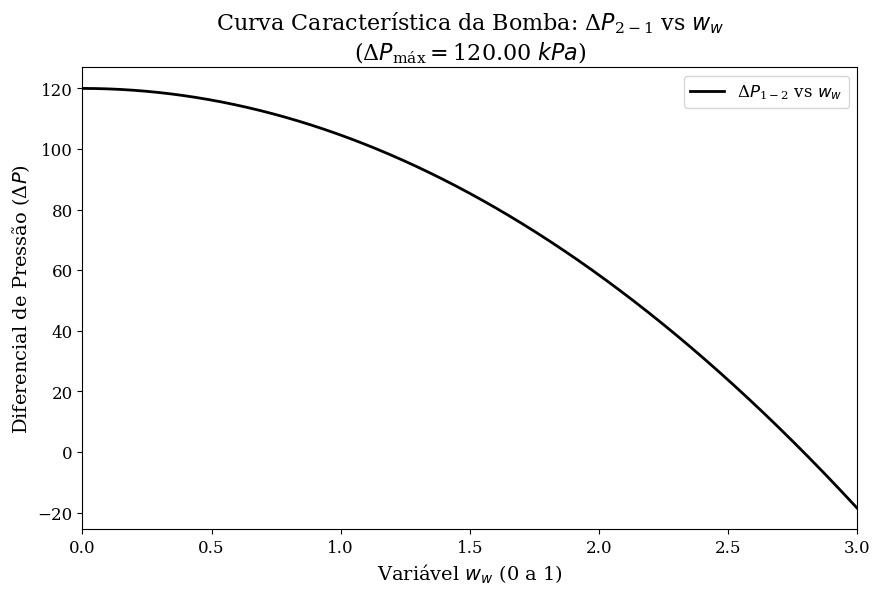

In [3]:
# @title
# =========== CURVA DA BOMBA. COMO DELTA_P = P_2 - P_1 = f(w) ===========
PA_PARA_KPA = 1000.0
d_w_w = 0.001
vetor_w_w =  np.arange(start=0.0, stop=(3.0+d_w_w), step = d_w_w) # Aqui gerei os pontos para vazão da água
memoria_delta_P_2_1 = [] # memória para salvar os valores calculados

for w_w in vetor_w_w:
    delta_P_2_1 =  (120000 - 15400*(w_w**2))/PA_PARA_KPA # na questão foi dada em Pa, por isso precisa converter
    memoria_delta_P_2_1.append(delta_P_2_1)

delta_P_maximo = np.max(memoria_delta_P_2_1)

# =========== PLOTAGEM DO GRÁFICO ===========

# --- CONFIGURAÇÃO DA FONTE TIMES NEW ROMAN ---
plt.rcParams['font.family'] = 'serif'           # Define a família principal para serifa (Times, Garamond, etc.)
plt.rcParams['font.serif'] = 'DejaVu Serif'  # Especifica a fonte para a família 'serif'
plt.rcParams['font.size'] = 12                  # Define um tamanho de fonte base para o gráfico
# Opcional: Garante que a notação matemática também siga a fonte
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Serif'
# ---------------------------------------------

titulo_dinamico = (
    f'Curva Característica da Bomba: $\\Delta P_{{2-1}}$ vs $w_w$\n'
    f'($\\Delta P_{{\\text{{máx}}}} = {delta_P_maximo:.2f}$ $kPa$)'
)

#  ---------------------------------------------

## cria a figura e os eixos do gráfico
plt.figure(figsize = (10, 6)) # Define o tamanho da figura
plt.plot(vetor_w_w, memoria_delta_P_2_1, color='black', linewidth=2, label = r'$\Delta P_{1-2}$ vs $w_w$') #plota os dados em X e Y
plt.title(titulo_dinamico, fontsize=16) # configuração do título
plt.xlabel(r'Variável $w_w$ (0 a 1)', fontsize = 14)
plt.ylabel(r'Diferencial de Pressão ($\Delta P$)', fontsize=14)
plt.legend(fontsize = 12) # adiciona legenda à curva
plt.xlim(0, 3) #Garante que os limites do eixo x sejam respeitados
plt.show() # Mostra o gráfico


### Análise da Curva Característica da Bomba

O gráfico apresenta a Curva Característica da Bomba, que é a relação entre o Diferencial de Pressão que a bomba fornece e a Vazão Mássica de Água que ela movimenta.

---

***Nota 3 -** A curva apresenta um formato parabólico decrescente que reflete a equação fornecida para $P_2 - P_1$.*

---

***Nota 4 -** A Altura Manométrica Máxima $(\Delta P_{max} = 120.0$ $[kPa])$ ocorre quando a vazão é nula.*

---



## 7. $\Delta P_\text{1-2}$ e $\Delta P_\text{2-4}$ em função da vazão $(w_w)$.

É possível definir $c_v$ em função de $w_w$, assim, essa análise teve como objetivo variar a vazão para compreender os impactos ocorridos nas variações de pressões $\Delta P_\text{1-2}$ e $\Delta P_\text{2-4}$, bem como o comportamento do coeficiente da válvula $(c_v)$.

A expressão analítica para $c_v = f(w_w)$ foi estabelecida por meio da dedução das equações hidráulicas, em conjunto com a condição de contorno $P_1 = P_4$. As perdas e ganhos de pressão ao longo do circuito são descritos pelas Equações (I) a (III):

$$
\Delta P = P_2 - P_1 = 120000 - 15400 w_w^2 \tag{I}
$$

$$
P_2 - P_3 = \left(\frac{w_w}{Cv}\right)^2 \tag{II}
$$

$$
P_3 - P_4 = 9260  w_w^2 \tag{III}
$$

Considerando a condição de $P_1 = P_4$, a Equação (III) é reescrita:

$$
P_3 - P_1 = 9260 \cdot w_w^2 \tag{IV}
$$

Multiplicando (IV) por (-1):

$$
P_1 - P_3 = - 9260 \cdot w_w^2 \tag{V}
$$

A combinação das Equações (I) e (V) — por meio da soma $(P_2 - P_1) + (P_1 - P_3)$ — permite determinar a diferença de pressão $P_2 - P_3$, conforme detalhado em (VI):

$$
P_2 - P_3 = 120000 - 24660 w_w^2 \tag{VI}
$$

Finalmente, ao igualar a Equação (VI) com a Equação (II), que também representa a diferença de pressão $P_2 - P_3$, e realizar o rearranjo algébrico para isolar a variável $c_v$, chega-se à expressão definitiva para o coeficiente da válvula em função da vazão:

$$
c_v = \frac{w_w}{\sqrt(120000 - 24660 w_w^2)} \tag{21}
$$




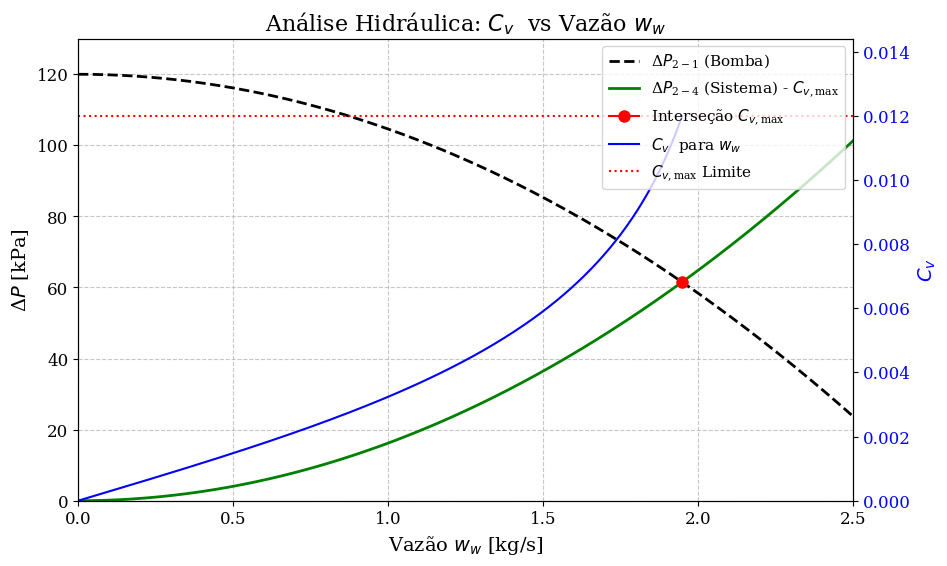

Ponto de Interseção (C_v Máximo):
Vazão (w_w) = 1.949 kg/s
Diferencial de Pressão (ΔP) = 61.53 kPa
C_v Máximo (Calculado) = 0.011998


In [4]:
# @title
# ==================== CONSTANTES & VETORES ====================
PA_PARA_KPA = 1000.0
C_V_MAXIMO = 0.012

# Define a faixa de vazão a ser VARRIDA (Eixo X)
d_w_w = 0.0001
vetor_w_w = np.arange(start=1e-6, stop=(3.0 + d_w_w), step=d_w_w)

# ==================== FUNÇÕES ANALÍTICAS ====================

def Delta_P_sistema_kPa(w_w, Cv):
    """Calcula a Curva do Sistema (Delta P 2-4) em kPa para um C_v dado."""
    # ΔP₂–₄ [Pa] = (w_w / C_v)^2 + 9260 * w_w^2

    # Previne divisão por zero
    if Cv == 0:
        return np.full_like(w_w, np.nan)

    delta_P_2_4_Pa = (w_w / Cv)**2 + 9260 * (w_w**2)
    return delta_P_2_4_Pa / PA_PARA_KPA

def Cv_em_funcao_ww(w_w):
    """
    Calcula C_v a partir da vazão w_w (Equação hidráulica invertida).
    C_v = sqrt( w_w**2 / (120000 - 24660 * w_w**2) )
    """
    numerador = w_w ** 2
    denominador = 120000 - 24660 * (w_w ** 2)

    # Condição que define a vazão MÁXIMA física
    condicao_valida = (denominador > 1e-9)

    Cv_quadrado = np.where(condicao_valida, numerador / denominador, np.nan)
    return np.sqrt(Cv_quadrado)

# ==================== CÁLCULO DAS CURVAS ====================

# A. Curva da Bomba (FIXA)
delta_P_bomba_kPa = (120000 - 15400 * (vetor_w_w**2)) / PA_PARA_KPA
delta_P_maximo = np.max(delta_P_bomba_kPa)

# B. Curva do Sistema (C_v Máximo) - Necessário para a interseção física
delta_P_max_sistema_kPa = Delta_P_sistema_kPa(vetor_w_w, C_V_MAXIMO)

# C. C_v Requerido (Locus do Ponto de Operação)
vetor_Cv_calculado = Cv_em_funcao_ww(vetor_w_w)

# Aplicação das restrições físicas (Cv <= Cv_MAX)
Cv_max_na_curva = (vetor_Cv_calculado > C_V_MAXIMO)
vetor_Cv_calculado[Cv_max_na_curva] = np.nan

# Filtragem dos pontos válidos para plotagem
w_w_validos = vetor_w_w[~np.isnan(vetor_Cv_calculado)]
Cv_validos = vetor_Cv_calculado[~np.isnan(vetor_Cv_calculado)]

# Delta P no Locus (Usando apenas w_w válidos)
delta_P_locus_Pa = 120000 - 15400 * (w_w_validos**2)
delta_P_locus_kPa = delta_P_locus_Pa / PA_PARA_KPA

# D. Ponto C_v Máximo (Ponto de Interseção)
indice_Cv_max = np.argmin(np.abs(Cv_validos - C_V_MAXIMO))
w_w_max = w_w_validos[indice_Cv_max]
delta_P_max_op = delta_P_locus_kPa[indice_Cv_max]


# ==================== PLOTAGEM NO MESMO GRÁFICO (DOIS EIXOS Y) ====================

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'DejaVu Serif', 'font.size': 12})
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Eixo Y1: Delta P [kPa] ---
ax1.set_xlabel(r'Vazão $w_w$ [kg/s]', fontsize=14)
ax1.set_ylabel(r'$\Delta P$ [kPa]', fontsize=14, color='black')

# 1. Curva da Bomba (FIXA de referência)
ax1.plot(vetor_w_w, delta_P_bomba_kPa, color='black', linestyle='--', linewidth=2,
         label=fr'$\Delta P_{{2-1}}$ (Bomba)')

# 2. Curva do Sistema (C_v Máximo) - O que faltava!
ax1.plot(vetor_w_w, delta_P_max_sistema_kPa, color='green', linestyle='-', linewidth=2,
         label=fr'$\Delta P_{{2-4}}$ (Sistema) - $C_{{v,\max}}$')

# 3. Ponto de Interseção (C_v Máximo)
ax1.plot(w_w_max, delta_P_max_op, marker='o', color='red', markersize=8, zorder=5,
         label=fr'Interseção $C_{{v,\max}}$')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 130)

# --- Eixo Y2: C_v [Unidade] ---
ax2 = ax1.twinx()
ax2.set_ylabel(r'$C_v$ ', fontsize=14, color='blue')

# 4. Curva C_v (Em função da Vazão)
ax2.plot(w_w_validos, Cv_validos, color='blue', linestyle='-', linewidth=1.5,
         label=r'$C_v$  para $w_w$')

# 5. Limite C_v Máximo (Linha de restrição)
ax2.axhline(C_V_MAXIMO, color='red', linestyle=':', linewidth=1.5, label=fr'$C_{{v,\max}}$ Limite')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, C_V_MAXIMO * 1.2)

# --- Título e Legendas ---
plt.title(r'Análise Hidráulica: $C_v$  vs Vazão $w_w$', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combina as legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=11)

ax1.set_xlim(0, 2.5)
plt.show()

# ==================== RESULTADO NUMÉRICO (C_v MÁXIMO) ====================
print(f"Ponto de Interseção (C_v Máximo):")
print(f"Vazão (w_w) = {w_w_max:.3f} kg/s")
print(f"Diferencial de Pressão (ΔP) = {delta_P_max_op:.2f} kPa")
print(f"C_v Máximo (Calculado) = {Cv_validos[indice_Cv_max]:.6f}")

## 9. Variação da Vazão da água em função do Coeficiente da Válcula $(c_v)$

A seção atual do estudo dedicou-se à interpretação da relação  $w_w = f(c_v)$, sem levar em consideração a relação de $c_v$ com a temperatura.

Em decorrência disso, o $c_v$ foi submetido a um variação estabelecida por $0 \leq c_v \leq 0.012$. Tal delimitação do domínio de estudo visa  assegurar a coerência com os limites físico do sistema em análise.

A expressão analítica para $w_w = f(c_v)$ foi estabelecida por meio da reorganização da Equação $21$ deduzida para $c_v$.

$$
w_w = \sqrt{\frac{120000c_v^2}{1 + 24660c_v^2}} \tag{22}
$$

---

***Nota 7 -** A variação de $c_v$ está em conformidade com o gráfico apresentado na Figura $6-24$.*

---


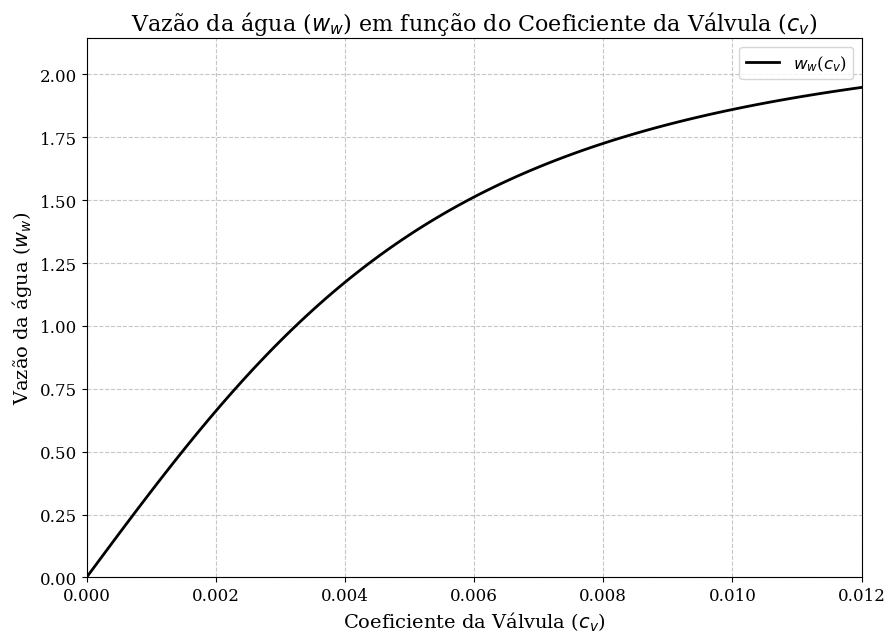

In [5]:
# @title
# =========== CÓDIGO DE INICIALIZAÇÃO E FUNÇÃO ===========

# Definição dos incrementos
#d_T = 0.0001
d_c_v = 0.0001
# Faixa de T que garante c_v >= 0
#vetor_T_c_v = np.arange(start=10.0, stop=(12 + d_T), step=d_T)  # T > 10 para c_v positivo

# Vetorização do cálculo de c_v
#vetor_c_v = 0.006 * vetor_T_c_v - 0.06
vetor_c_v = np.arange(start=0, stop=(0.012 + d_c_v), step=d_c_v)

# Vetorização do cálculo de w_w
vetor_w_w_varia_com_cv = np.sqrt((120000 * vetor_c_v**2) / (1 + 24660 * vetor_c_v**2))

# =========== CONFIGURAÇÃO E PLOTAGEM DO GRÁFICO ===========

# --- CONFIGURAÇÃO DA FONTE ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif' # Estilo da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Serif' # Estilo da fonte
# ---------------------------------------------

titulo_dinamico = 'Vazão da água ($w_w$) em função do Coeficiente da Válvula ($c_v$)'

# Criar o ambiente de plotagem
plt.figure(figsize=(10, 7))

# Plotagem
plt.plot(vetor_c_v, vetor_w_w_varia_com_cv,
         color='black', linestyle='-', linewidth=2, label=r'$w_w(c_v)$')

# Configurações finais
plt.title(titulo_dinamico, fontsize=16)
plt.xlabel(r'Coeficiente da Válvula ($c_v$)', fontsize=14)
plt.ylabel(r'Vazão da água ($w_w$)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Limites dos eixos com folga visual
plt.xlim(vetor_c_v.min(), vetor_c_v.max())
plt.ylim(0, 1.1 * vetor_w_w_varia_com_cv.max())

plt.show()

### Análise  da variação da vazão $w_w$ em função de $c_v$.


O gráfico em análise evidencia um comportamento  crescente e curvilíneo no intervalo $0 \leq c_v \leq 0.012$. Observa-se que, para valores reduzidos do coeficiente, a curva exibe uma elevada inclinação, o que denota uma alta sensibilidade do $w_w$ às variações de $c_v$. No entanto, à medida que $c_v$ aumenta, a curva manifesta uma taxa de crescimento menor, aproximando-se de um valor limite. Na extremidade do intervalo, o $w_w$ atinge um valor ligeiramente inferior a $2.0 \text{ kg/s}$. Sob tais condições, as perdas de carga distribuídas e localizadas no restante do circuito tornam-se o fator limitante predominante do fluxo mássico.

---


## 10. Estudo da vazão $(w_w)$ e do coeficiente da válvula $(c_v)$ em função da temperatura $(T_{ar,out})$


Nenhuma das análises anteriores considerou a influência da temperatura. No entanto, a temperatura causa grandes impactos em qualquer sistema e não deve ser negligenciada. Desta forma, a presente análise tem por objetivo discutir a influência desse parâmetro no $c_v$ e, por consequência, na $w_w$.

Para um melhor entendimento dessa discussão, é fundamental relembrar as relações matemáticas utilizadas:

$$
C_v = 0{,}006 \, T_{\text{ar,out}} - 0{,}06 \tag{19}
$$

$$
w_w = \sqrt{\frac{120000c_v^2}{1 + 24660c_v^2}} \tag{22}
$$

Outrossim, é importante lembrar que é desejavél temperaturas no intervalo $10^\circ C \leq T \leq 12^\circ C$

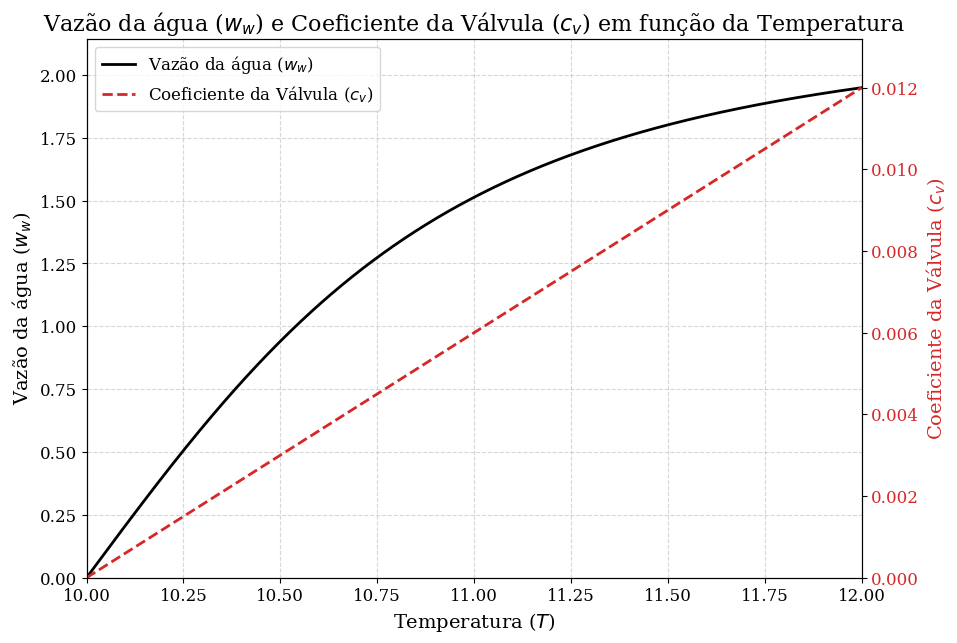

In [7]:
# =========== CÓDIGO DE INICIALIZAÇÃO E FUNÇÃO ===========

# Definição dos incrementos
d_T = 0.0001

# Faixa de T que garante c_v >= 0
vetor_T_c_v = np.arange(start=10.0, stop=(12 + d_T), step=d_T) # T > 10 para c_v positivo

# Vetorização do cálculo de c_v
vetor_c_v = 0.006 * vetor_T_c_v - 0.06

# Vetorização do cálculo de w_w
vetor_w_w_varia_com_cv = np.sqrt((120000 * vetor_c_v**2) / (1 + 24660 * vetor_c_v**2))

# =========== CONFIGURAÇÃO E PLOTAGEM DO GRÁFICO ===========

# --- CONFIGURAÇÃO DA FONTE ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif' # Estilo da fonte
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Serif' # Estilo da fonte
# ---------------------------------------------

# Criar o ambiente de plotagem (figura principal)
fig, ax1 = plt.subplots(figsize=(10, 7))

# --- PLOTAGEM 1: Vazão da Água (w_w) no Eixo Y Esquerdo (ax1) ---
cor_w_w = 'black'
ax1.plot(vetor_T_c_v, vetor_w_w_varia_com_cv,
         color=cor_w_w, linestyle='-', linewidth=2, label=r'Vazão da água ($w_w$)')

# Rótulo e cor do eixo Y esquerdo
ax1.set_xlabel(r'Temperatura ($T$)', fontsize=14)
ax1.set_ylabel(r'Vazão da água ($w_w$)', color=cor_w_w, fontsize=14)
ax1.tick_params(axis='y', labelcolor=cor_w_w)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_ylim(0, 1.1 * vetor_w_w_varia_com_cv.max()) # Limite para w_w

# --- PLOTAGEM 2: Coeficiente da Válvula (c_v) no Eixo Y Direito (ax2) ---
ax2 = ax1.twinx()  # Cria um segundo eixo Y que compartilha o mesmo eixo X (T)
cor_c_v = 'tab:red'
ax2.plot(vetor_T_c_v, vetor_c_v,
         color=cor_c_v, linestyle='--', linewidth=2, label=r'Coeficiente da Válvula ($c_v$)')

# Rótulo e cor do eixo Y direito
ax2.set_ylabel(r'Coeficiente da Válvula ($c_v$)', color=cor_c_v, fontsize=14)
ax2.tick_params(axis='y', labelcolor=cor_c_v)
ax2.set_ylim(0, 1.1 * vetor_c_v.max()) # Limite para c_v

# --- Configurações Finais ---
titulo_dinamico = 'Vazão da água ($w_w$) e Coeficiente da Válvula ($c_v$) em função da Temperatura'
plt.title(titulo_dinamico, fontsize=16)

# Limites do Eixo X (Temperatura)
ax1.set_xlim(vetor_T_c_v.min(), vetor_T_c_v.max())

# Ajustar a legenda (pegar ambas as linhas)
linhas_ax1, labels_ax1 = ax1.get_legend_handles_labels()
linhas_ax2, labels_ax2 = ax2.get_legend_handles_labels()
ax1.legend(linhas_ax1 + linhas_ax2, labels_ax1 + labels_ax2, loc='upper left')

plt.show()

### 10.1 - Análise

A partir da modelagem, verifica-se a conformidade do crescimento linear de $c_v$ no intervalo das temperaturas desejáveis. Ademais, a vazão ($w_w$) apresenta um comportamento similar ao observado anteriormente. Este resultado é um reflexo direto da variação linear de $c_v$ no intervalo $10^\circ C \leq T \leq 12^\circ C$.


Porém, a linearidade de $c_v$ só é garantida dentro do intervalo mencionado e por isso é importante analisar mais cenários. 

---

### 10.2 -Análise Integrada do Comportamento de $w_w$ Sob Diferentes Hipóteses de Extrapolação de $C_v$

O estudo do comportamento da Vazão da Água ($w_w$) no intervalo $\mathbf{10^\circ C \leq T \leq 20^\circ C}$ exige a análise de duas hipóteses de extrapolação para o Coeficiente da Válvula , uma vez que a validade da modelagem linear ($C_v = 0{,}006 \, T - 0{,}06$) é garantida apenas até $\mathbf{T = 12^\circ C}$.

---


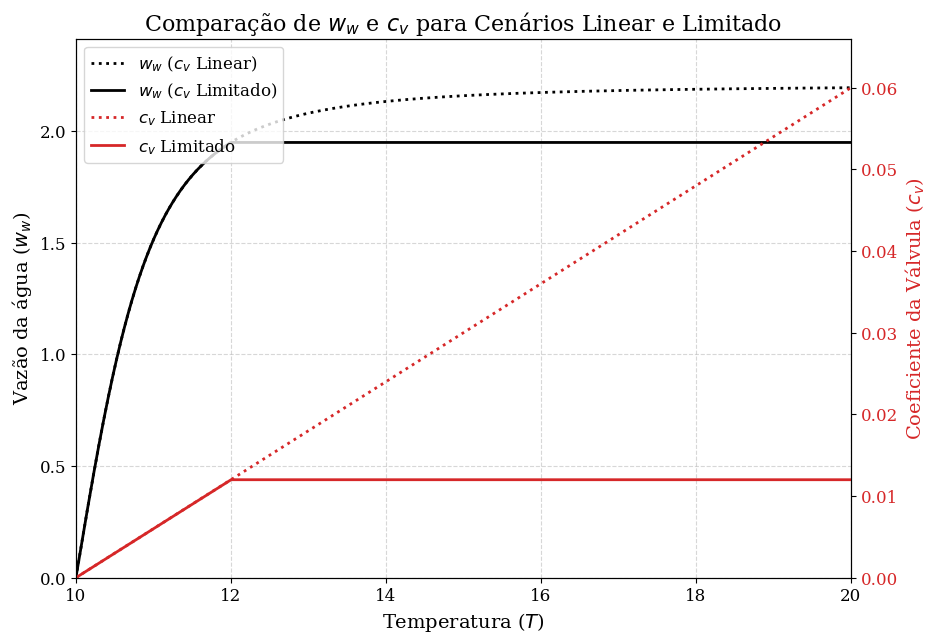

In [12]:
# ======================= CÁLCULOS PARA AMBOS OS CENÁRIOS =======================

# Definição dos incrementos
d_T = 0.0001
T_LIMITE = 12.0 # O ponto de transição onde c_v se torna constante
vetor_T = np.arange(start=10.0, stop=(20.0 + d_T), step=d_T)

# 1. CENÁRIO C_v LINEAR (Calcula c_v e o w_w resultante)
vetor_c_v_linear = 0.006 * vetor_T - 0.06
vetor_w_w_linear = np.sqrt((120000 * vetor_c_v_linear**2) / (1 + 24660 * vetor_c_v_linear**2))

# 2. CENÁRIO C_v LIMITADO (Calcula c_v e o w_w resultante)
# Definir o valor constante de c_v
c_v_constante = 0.006 * T_LIMITE - 0.06 # Valor: 0.012

# Cria o vetor de c_v limitado
vetor_c_v_limitado = np.copy(vetor_c_v_linear)
indices_extrapolacao = vetor_T > T_LIMITE
vetor_c_v_limitado[indices_extrapolacao] = c_v_constante

# Calcular w_w com o c_v limitado
vetor_w_w_limitado = np.sqrt((120000 * vetor_c_v_limitado**2) / (1 + 24660 * vetor_c_v_limitado**2))


# ======================= CONFIGURAÇÃO E PLOTAGEM DO GRÁFICO =======================

# --- CONFIGURAÇÃO DA FONTE ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'DejaVu Serif'
# -----------------------------

# Criar o ambiente de plotagem
fig, ax1 = plt.subplots(figsize=(10, 7))

# --- PLOTAGEM EIXO Y ESQUERDO (w_w) ---
cor_w_w = 'black'
ax1.set_xlabel(r'Temperatura ($T$)', fontsize=14)
ax1.set_ylabel(r'Vazão da água ($w_w$)', color=cor_w_w, fontsize=14)
ax1.tick_params(axis='y', labelcolor=cor_w_w)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plotar w_w para o C_v Linear
ax1.plot(vetor_T, vetor_w_w_linear,
         color=cor_w_w, linestyle=':', linewidth=2,
         label=r'$w_w$ ($c_v$ Linear)')

# Plotar w_w para o C_v Limitado
ax1.plot(vetor_T, vetor_w_w_limitado,
         color=cor_w_w, linestyle='-', linewidth=2,
         label=r'$w_w$ ($c_v$ Limitado)')

# Ajustar limite Y de w_w com base no máximo dos dois vetores
max_w_w = max(vetor_w_w_linear.max(), vetor_w_w_limitado.max())
ax1.set_ylim(0, 1.1 * max_w_w)


# --- PLOTAGEM EIXO Y DIREITO (c_v) ---
ax2 = ax1.twinx() # Cria um segundo eixo Y que compartilha o mesmo eixo X (T)
cor_c_v = 'tab:red'
ax2.set_ylabel(r'Coeficiente da Válvula ($c_v$)', color=cor_c_v, fontsize=14)
ax2.tick_params(axis='y', labelcolor=cor_c_v)

# Plotar c_v Linear
ax2.plot(vetor_T, vetor_c_v_linear,
         color=cor_c_v, linestyle=':', linewidth=2,
         label=r'$c_v$ Linear')

# Plotar c_v Limitado
ax2.plot(vetor_T, vetor_c_v_limitado,
         color=cor_c_v, linestyle='-', linewidth=2,
         label=r'$c_v$ Limitado')

# Ajustar limite Y de c_v com base no máximo dos dois vetores (do linear, que é o maior)
ax2.set_ylim(0, 1.1 * vetor_c_v_linear.max())


# --- Configurações Finais ---
titulo_final = r'Comparação de $w_w$ e $c_v$ para Cenários Linear e Limitado'
plt.title(titulo_final, fontsize=16)

# Limites do Eixo X (Temperatura)
ax1.set_xlim(vetor_T.min(), vetor_T.max())

# Ajustar a legenda para incluir TODAS as 4 linhas
# Coleta as linhas e labels de ambos os eixos
linhas_ax1, labels_ax1 = ax1.get_legend_handles_labels()
linhas_ax2, labels_ax2 = ax2.get_legend_handles_labels()
# Combina e cria a legenda no ax1
ax1.legend(linhas_ax1 + linhas_ax2, labels_ax1 + labels_ax2, loc='upper left', framealpha=0.8)

plt.show()

### 10.2.1 - Comportamento Comum no Domínio Válido ($\mathbf{10^\circ C \leq T \leq 12^\circ C}$)

Inicialmente, no **intervalo de validade da modelagem**, o crescimento do Coeficiente da Válvula e o consequente aumento da Vazão ($w_w$) são **idênticos** em ambos os cenários (Extrapolação Linear e Constante).

A vazão atinge o mesmo valor no ponto de transição, $T=12^\circ C$, confirmando a consistência dos dados de entrada antes da divergência das hipóteses.

---

### 10.2.2 - Análise da Divergência no Domínio Extrapolado ($\mathbf{T > 12^\circ C}$)

A divergência entre os resultados ocorre no domínio de extrapolação, onde as duas hipóteses sobre o comportamento do $c_v$ impõem limites distintos à vazão $w_w$:

#### A. Extrapolação $C_v$ Linear

Neste cenário (representado pelas linhas pontilhadas), assume-se a **continuidade da tendência linear** do $c_v$. O **Coeficiente da Válvula** continua a aumentar linearmente, atingindo o máximo de $\mathbf{0.060}$ em $T=20^\circ C$.

Em consequência, a curva de $w_w$ revela o seu **comportamento intrínseco e não-linear**: a alta taxa de crescimento inicial reduz-se drasticamente no domínio extrapolado, levando à **saturação assintótica** em direção ao seu limite máximo teórico ($\mathbf{\approx 2.19}$).

Esta projeção serve para ilustrar o **potencial de saturação** inerente à função $w_w(c_v)$ (Equação 22), caso a linearidade fosse mantida.

#### B. Extrapolação $c_v$ Constante

Por outro lado, o cenário de $c_v$ constante (representado pelas linhas sólidas) é uma **extrapolação de limite** que reflete uma restrição prática. O **Coeficiente da Válvula** é assumido como saturando abruptamente em $\mathbf{0.012}$ no ponto de transição ($T=12^\circ C$) e mantendo-se constante.

O impacto na vazão é imediato: o $w_w$ atinge seu pico restrito e se torna **perfeitamente constante** a partir de $T=12^\circ C$.

Este cenário é mais coerente com a ideia de um **limite de projeto**: o aumento de temperatura acima do ponto de transição é irrelevante para o aumento da vazão.

---

### 10.2.3 - Conclusão Metodológica

Em suma, a comparação gráfica valida visualmente o impacto da natureza da extrapolação na vazão final do sistema.

Enquanto a **extrapolação linear** fornece o **limite superior teórico** da vazão, a **extrapolação constante** estabelece o **limite rígido de controle**.

Ambos os resultados são válidos para seus respectivos propósitos analíticos. Contudo, os valores projetados para $\mathbf{T > 12^\circ C}$ são projeções puramente teóricas; para determinar a precisão prática, é essencial realizar uma confirmação experimental que valide qual hipótese é a real: a continuidade da linearidade do $C_v$ ou a imposição de um limite rígido pelo sistema de controle.

---

## 11. Análise de Variação de Pressão em Função da Temperatura ($T_{\text{ar,out}}$)


### 11.1 - Contexto Físico e Objetivo

O sistema modelado é um circuito hidráulico que utiliza um trocador de calor (serpentina) e possui uma bomba e uma válvula de controle. A variável de controle é a temperatura do ar na saída ($T_{\text{ar,out}}$).

### 11.1.1 - Vínculo entre Variáveis
A válvula de controle modula o fluxo de água ($w_w$) com base na temperatura $T_{\text{ar,out}}$, seguindo a **Equação do Coeficiente da Válvula (19)**:

$$c_v = 0,006 \cdot T_{\text{ar,out}} - 0,06 \tag{19}$$

Quando $T_{\text{ar,out}}$ aumenta, $c_v$ aumenta, abrindo a válvula.

### 11.1.2 - Condição de Equilíbrio Hidráulico
Em qualquer ponto de operação estável, a vazão de água $w_w$ se ajusta até que a pressão fornecida pela bomba se iguale à perda de carga total do sistema (válvula + serpentina).

$$\Delta P_{\text{Bomba}} = \Delta P_{\text{Sistema}}$$
$$P_2 - P_1 = (P_2 - P_3) + (P_3 - P_4)$$

Substituindo as equações do problema (16, 17 e 18):

$$120000 - 15400 \cdot w_w^2 = \left(\frac{w_w}{c_v}\right)^2 + 9260 \cdot w_w^2 \tag{Locus}$$

### 11.1.3 - Objetivo da Simulação
O objetivo não foi encontrar um único ponto de operação (o que exigiria Newton-Raphson), mas sim **simular a variação das componentes de pressão** ($P_2 - P_1$, $P_2 - P_3$, $P_3 - P_4$) ao longo da faixa de controle de temperatura ($10^\circ \text{C} \le T_{\text{ar,out}} \le 12^\circ \text{C}$).

### 11.1.4 - Abordagem Numérica e Analítica

O método utilizado para gerar a curva foi a **Solução Analítica Direta**, e não a simulação numérica iterativa.

### 11.2 - Passos Analíticos
Para plotar as curvas em função de $T_{\text{ar,out}}$, a chave foi resolver a Equação do Locus para isolar $w_w^2$ em função de $c_v^2$:

**Passo A: Isolar $w_w^2$ na Equação do Locus**
$$120000 = \left(\frac{1}{c_v^2}\right)w_w^2 + (15400 + 9260) \cdot w_w^2$$
$$120000 = \left[\left(\frac{1}{c_v^2}\right) + 24660\right] \cdot w_w^2$$
$$120000 = \left[\frac{1 + 24660 \cdot c_v^2}{c_v^2}\right] \cdot w_w^2$$

**Passo B: Fórmula do Locus da Vazão ($w_w^2$)**
Isolando $w_w^2$:
$$w_w^2 = \frac{120,000 \cdot C_v^2}{1 + 24660 \cdot c_v^2}$$

### 11.2.1 - Sequência de Simulação
O código executa uma varredura (incrementos de $d\_T$) e, para cada ponto, realiza os cálculos na seguinte ordem direta:

1.  **Entrada:** Define um valor de $T_{\text{ar,out}}$.
2.  **$C_v$:** Calcula $C_v$ usando a Equação (19).
3.  **$w_w$ de Equilíbrio:** Calcula $w_w^2$ usando a fórmula do Locus de Vazão (Passo B). **Isto força o ponto de operação a estar na intersecção das curvas.**
4.  **$\Delta P$ Componentes:** Usa o valor de $w_w^2$ de equilíbrio para calcular as três pressões separadamente:
    * $\Delta P_{21} = 120000 - 15400 \cdot w_w^2$
    * $\Delta P_{34} = 9260 \cdot w_w^2$
    * $\Delta P_{23} = \Delta P_{21} - \Delta P_{34}$ (Usado para garantir consistência).


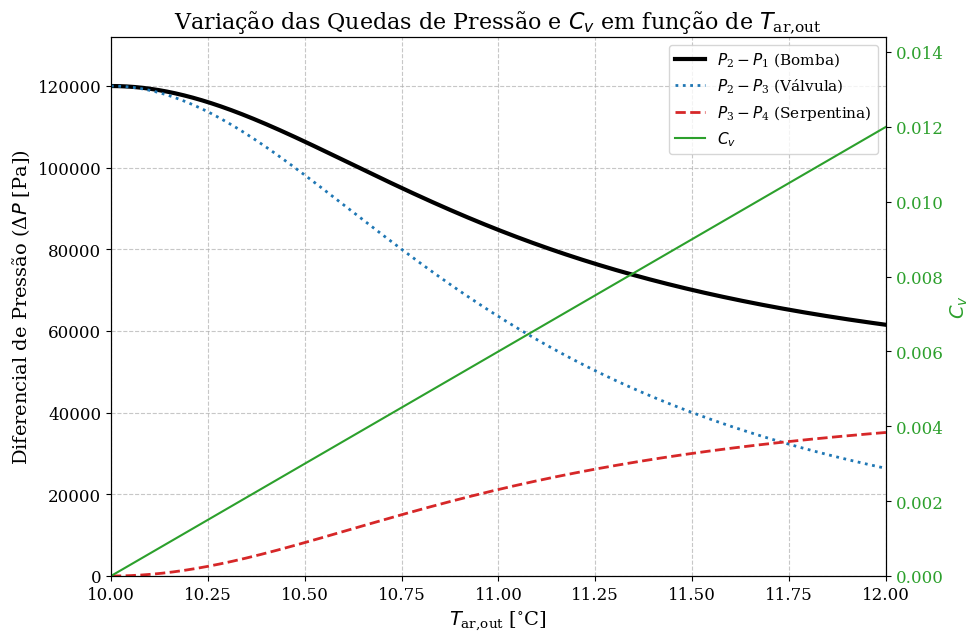

In [14]:
# =========== DADOS E CÁLCULOS T => w_w DE EQUILÍBRIO ===========

d_T = 0.0001
# T é a temperatura de saída do ar (T_ar,out)
vetor_T_ar_out = np.arange(start=10.0, stop=(12 + d_T), step=d_T)

# Constantes Hidráulicas (do Enunciado)
K_bomba = 15400.0 # Coeficiente em P2 - P1
K_serpentina = 9260.0 # Coeficiente em P3 - P4
P_max_bomba = 120000.0 # Termo constante em P2 - P1
K_soma = K_bomba + K_serpentina # 24660.0

# 1. C_v em função de T_ar,out (Equação 19)
vetor_c_v = 0.006 * vetor_T_ar_out - 0.06

# 2. Vazão w_w de EQUILÍBRIO (Solução da equação do locus P2-P1 = (P2-P3) + (P3-P4))
# w_w^2 = P_max_bomba * C_v^2 / (1 + K_soma * C_v^2)
vetor_w_w_quadrado = P_max_bomba * vetor_c_v**2 / (1 + K_soma * vetor_c_v**2)
vetor_w_w = np.sqrt(vetor_w_w_quadrado)


# ==================== CÁLCULOS DAS PRESSÕES (NOMENCLATURA ORIGINAL) ====================

# 1. Diferença de Pressão na Bomba (P_2 - P_1) - Equação 16 / Locus
vetor_P2_menos_P1 = P_max_bomba - K_bomba * vetor_w_w_quadrado

# 2. Queda de Pressão na Serpentina (P_3 - P_4) - Equação 18
vetor_P3_menos_P4 = K_serpentina * vetor_w_w_quadrado

# 3. Queda de Pressão na Válvula (P_2 - P_3) - Equação 17
# P_2 - P_3 = (P_2 - P_1) - (P_3 - P_4) (Para T > 10)
# Para o ponto T=10, (w_w/C_v)^2 é 120000.
# Usamos a subtração para garantir que P2-P1 = (P2-P3) + (P3-P4) seja preservada.
vetor_P2_menos_P3 = vetor_P2_menos_P1 - vetor_P3_menos_P4

P_max_plot = vetor_P2_menos_P1.max()


# =========== PLOTAGEM COM NOMENCLATURA ORIGINAL VS T ===========

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'DejaVu Serif', 'font.size': 12})
fig, ax1 = plt.subplots(figsize=(10, 7))

# --- Eixo Y1: Pressão Delta P [Pa] ---
cor_p = 'black'
ax1.set_xlabel(r'$T_{\text{ar,out}}$ [$^{\circ}$C]', fontsize=14)
ax1.set_ylabel(r'Diferencial de Pressão ($\Delta P$ [Pa])', fontsize=14, color=cor_p)

# 1. Curva da Bomba (P_2 - P_1)
ax1.plot(vetor_T_ar_out, vetor_P2_menos_P1,
         color='black', linestyle='-', linewidth=3, label=r'$P_2 - P_1$ (Bomba)')

# 2. Curva da Válvula (P_2 - P_3)
ax1.plot(vetor_T_ar_out, vetor_P2_menos_P3,
         color='tab:blue', linestyle=':', linewidth=2, label=r'$P_2 - P_3$ (Válvula)')

# 3. Curva da Serpentina (P_3 - P_4)
ax1.plot(vetor_T_ar_out, vetor_P3_menos_P4,
         color='tab:red', linestyle='--', linewidth=2, label=r'$P_3 - P_4$ (Serpentina)')

ax1.tick_params(axis='y', labelcolor=cor_p)
ax1.set_ylim(0, P_max_plot * 1.1)


# --- Eixo Y2: C_v [Unidade] ---
ax2 = ax1.twinx()
cor_cv = 'tab:green'
ax2.set_ylabel(r'$C_v$', fontsize=14, color=cor_cv)

# 4. Curva C_v (Em função de T)
ax2.plot(vetor_T_ar_out, vetor_c_v, color=cor_cv, linestyle='-', linewidth=1.5,
         label=r'$C_v$')

ax2.tick_params(axis='y', labelcolor=cor_cv)
ax2.set_ylim(0, vetor_c_v.max() * 1.2)

# --- Título e Legendas ---
plt.title(r'Variação das Quedas de Pressão e $C_v$ em função de $T_{\text{ar,out}}$', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combina as legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=11)

ax1.set_xlim(vetor_T_ar_out.min(), vetor_T_ar_out.max())
plt.show()

###  Conclusão Física do Gráfico

O gráfico final mostra como as quedas de pressão se distribuem no circuito à medida que a válvula abre (o que acontece quando $T_{\text{ar,out}}$ sobe):

* **$\Delta P_{21}$ (Bomba):** É a curva superior. Começa alta ($120000 \text{ Pa}$ em $T=10^\circ \text{C}$) e cai à medida que $w_w$ aumenta. Representa a pressão total de equilíbrio.
* **$\Delta P_{34}$ (Serpentina):** Representa a perda de carga fixa que depende apenas de $w_w^2$. Como $w_w$ aumenta com $T_{\text{ar,out}}$, esta perda **aumenta**.
* **$\Delta P_{23}$ (Válvula):** Representa a queda de pressão de controle. Como $\Delta P_{23} = \Delta P_{21} - \Delta P_{34}$, e a queda na bomba é maior do que a subida na serpentina, a pressão da válvula **diminui** com o aumento de $T_{\text{ar,out}}$.

A soma de $\Delta P_{23}$ e $\Delta P_{34}$ é sempre igual a $\Delta P_{21}$ em todos os pontos, confirmando a condição de equilíbrio físico imposta pela modelagem.

---
---

## 12. Solução do problema

---

## 1. A Solução Física: O Equilíbrio Térmico-Hidráulico

Na engenharia, a solução numérica (Newton-Raphson ou Minimização) é apenas a ferramenta para encontrar o **Ponto de Equilíbrio Físico**.

A essência desse problema é o **acoplamento** entre três sub-sistemas:

1.  **O Controle Térmico (Válvula):** A temperatura de saída do ar ($T_{\text{ar,out}}$) **comanda** a válvula, determinando o coeficiente $C_v$.

    $$\mathbf{T_{\text{ar,out}}} \rightarrow C_v$$

2.  **O Equilíbrio Hidráulico (Bomba/Perdas):** O valor de $C_v$ (definido pela válvula) força a vazão de água ($w_w$) a se ajustar a um valor único que garante que a pressão fornecida pela bomba seja **exatamente igual** à perda de carga total na válvula e serpentina.
    $$C_v \rightarrow \mathbf{w_w}$$

3.  **A Transferência de Calor (Trocador):** A nova vazão de água ($w_w$) determina o calor trocado ($Q$), que, por sua vez, define a nova temperatura de saída do ar ($T_{\text{ar,out}}$) e da água ($T_4$).

    $$w_w \rightarrow Q \rightarrow \mathbf{T_{\text{ar,out}}}$$

O sistema está em **Equilíbrio Físico** quando a **vazão de água $w_w$** e a **temperatura de saída $T_{\text{ar,out}}$** se fecham em um *loop* consistente, onde:

$$\mathbf{T_{\text{ar,out}}} \xrightarrow{\text{Válvula}} C_v \xrightarrow{\text{Hidráulica}} w_w \xrightarrow{\text{Térmica}} Q \xrightarrow{\text{Trocador}} \mathbf{T_{\text{ar,out}}}$$

---

### O Papel da Solução Numérica

A solução numérica (o ponto $\mathbf{x}$ que zera $\mathbf{F}(\mathbf{x})$) é o único ponto onde o ciclo acima se fecha de forma consistente.

* **Se a solução não for a raiz:** O sistema estaria instável, com a vazão calculada pelo trocador sendo diferente da vazão calculada pela bomba/válvula, ou o calor absorvido pela água não seria igual ao calor cedido pelo ar.
* **A Solução Única:** Representa o **estado estacionário** (steady-state), onde o sistema converge e mantém todos os balanços físicos (massa, energia e pressão) satisfeitos, operando em um ponto ditado pela característica da bomba, pela geometria do trocador (UA) e pela lei de controle da válvula ($C_v = f(T_{\text{ar,out}})$).

---

## Encontrando a solução por Newton-Rphson

---

Para determinar o único ponto de operação que satisfaz simultaneamente as equações de **Balanço de Energia** e o **Equilíbrio Hidráulico (Locus)**, utilizamos o método de Newton-Raphson multivariável através da função `fsolve` da biblioteca `scipy.optimize`.

### 1. Sistema de Equações de Erro ($\mathbf{F}(\mathbf{x}) = 0$)

O sistema foi reduzido para um problema $3 \times 3$, com o vetor de variáveis de iteração sendo $\mathbf{x} = \begin{pmatrix} w_w & T_{\text{ar,out}} & T_4 \end{pmatrix}^T$.

As três funções de erro ($\mathbf{F}_1, \mathbf{F}_2, \mathbf{F}_3$) que devem ser zeradas são:

1.  **Erro no Balanço de Energia (Ar vs. Água):** Garante que o calor cedido pelo ar ($Q_{\text{ar}}$) seja igual ao calor absorvido pela água ($Q_{\text{água}}$).

$$
\mathbf{F}_1 = Q_{\text{ar}} - Q_{\text{agua}} = {w_a \, c_{p,ar} \, (T_{\text{ar,in}} - T_{\text{ar,out}}) - w_w \, c_{p,w} \, (T_4 - T_3) = 0}
$$

2.  **Erro LMTD:** Garante que o calor trocado ($Q_{\text{ar}}$) seja consistente com a transferência de calor global ($UA \cdot \Delta T_{lm}$).

$$
\mathbf{F}_2 = Q_{\text{ar}} - UA \cdot \Delta T_{lm} = {w_a \, c_{p,ar} \, (T_{\text{ar,in}} - T_{\text{ar,out}}) - UA \cdot \Delta T_{lm} = 0}
$$

3.  **Erro do Locus Hidráulico:** Garante que a vazão $w_w$ iterada satisfaça a relação de equilíbrio hidráulico (curva da bomba vs. perda de carga total) para o $C_v$ calculado a partir de $T_{\text{ar,out}}$.

$$
\mathbf{F}_3 = \frac{\mathbf{C_1 \cdot C_v^2}}{1 + \mathbf{(C_2 + C_3)} C_v^2} - w_w^2 = 0
$$

*Onde $\mathbf{C_v} = \mathbf{C_{v,m}} \, T_{\text{ar,out}} - \mathbf{C_{v,b}}$.*

In [11]:
# @title
import numpy as np
from scipy.optimize import fsolve

# =========== 1. PARÂMETROS FIXOS DO SISTEMA ===========
# Parâmetros Termodinâmicos
w_ar = 4.0        # [kg/s] Vazão de ar (w_a)
c_p_ar = 1.0      # [kJ/kg.K] Calor específico do ar (c_p,ar)
T_ar_in = 28.0    # [°C] Temperatura de entrada do ar (T_ar,in)
c_p_w = 4.19      # [kJ/kg.K] Calor específico da água (c_p,w)
T_3 = 6.0         # [°C] Temperatura de entrada da água (T_3)
UA = 7.0          # [kW/K] Coeficiente global de troca de calor (UA)

# Parâmetros Hidráulicos (Coeficientes de Pressão, em Pa, conforme Stoecker)
# Bomba: Delta P = C1 - C2*ww^2 | Serpentina: Delta P = C3*ww^2
C1 = 120000       # Coeficiente da Bomba (Ponto de Pressão Máxima)
C2 = 15400        # Coeficiente da Vazão da Bomba
C3 = 9260         # Coeficiente da Perda de Carga da Serpentina
C2_C3_SUM = C2 + C3 # 24660, a soma utilizada no denominador do Locus (F3)


# Função de LMTD (Diferença de Temperatura Média Logarítmica)
def delta_T_lm(T_ar_out, T_4):
    """Calcula a Diferença de Temperatura Média Logarítmica (LMTD) para contra-corrente."""
    Delta_T1 = T_ar_in - T_4    # (T_ar,in - T_4)
    Delta_T2 = T_ar_out - T_3   # (T_ar,out - T_3)

    # Tratamento de log de valor não positivo e caso Delta_T1 ~= Delta_T2
    if Delta_T1 <= 0 or Delta_T2 <= 0:
        return 1e-6
    if np.isclose(Delta_T1, Delta_T2):
        return (Delta_T1 + Delta_T2) / 2

    return (Delta_T1 - Delta_T2) / np.log(Delta_T1 / Delta_T2)


# =========== 2. FUNÇÕES DE ERRO PARA O FSOLVE ===========

def sistema_erros(x):
    """
    Sistema de equações de erro F(x) = 0.
    Onde x = [w_w, T_ar_out, T_4]
    """
    w_w, T_ar_out, T_4 = x

    # --- C_v (Coeficiente da Válvula) ---
    # Implementação da curva linear (Eq. 19 / Fig. 6-24)
    C_v = 0.006 * T_ar_out - 0.06
    if C_v <= 0:
        C_v = 1e-6

    DT_lm = delta_T_lm(T_ar_out, T_4)
    Q_ar = w_ar * c_p_ar * (T_ar_in - T_ar_out)

    # --- F1: Erro no Balanço de Energia (Ar vs. Água) ---
    # F1: Q_cedido - Q_absorvido = 0
    Q_agua = w_w * c_p_w * (T_4 - T_3)
    F1 = Q_ar - Q_agua

    # --- F2: Erro no Balanço de Energia (Ar vs. LMTD) ---
    # F2: Q_cedido - Q_transferido = 0
    Q_lm = UA * DT_lm
    F2 = Q_ar - Q_lm

    # --- F3: Erro no Locus Hidráulico ---
    # F3 é a representação do equilíbrio: Delta P Bomba = Delta P Válvula + Delta P Serpentina
    # F3 = [C1 * C_v^2] / [1 + (C2 + C3) * C_v^2] - w_w^2 = 0
    ww2_locus = (C1 * C_v**2) / (1 + C2_C3_SUM * C_v**2)
    F3 = ww2_locus - w_w**2

    return [F1, F2, F3]

# =========== 3. SOLUÇÃO NUMÉRICA ===========

# CORREÇÃO CRÍTICA: Ajuste do chute inicial para forçar a convergência à raiz esperada (w_w > 1)
x0 = np.array([2.0, 12.0, 15.0])

# Encontra a raiz do sistema
solucao = fsolve(sistema_erros, x0)

# Extração e recálculo das variáveis
w_w_sol, T_ar_out_sol, T_4_sol = solucao

# Recálculo das Pressões Individuais (Para Verificação)
C_v_sol = 0.006 * T_ar_out_sol - 0.06
Q_sol = w_ar * c_p_ar * (T_ar_in - T_ar_out_sol)
P_2_P_1 = C1 - C2 * w_w_sol**2        # Delta P Bomba (P2 - P1)
P_2_P_3 = (w_w_sol / C_v_sol)**2      # Delta P Válvula (P2 - P3)
P_3_P_4 = C3 * w_w_sol**2             # Delta P Serpentina (P3 - P4)


# =========== 4. IMPRESSÃO DOS RESULTADOS COM ANÁLISE ===========

print("="*60)
print("  SOLUÇÃO DE PONTO ÚNICO DE OPERAÇÃO (NEWTON-RAPHSON)")
print("="*60)

# --- Tabela de Variáveis de Fluxo ---
print("\n--- 1. Variáveis de Fluxo e Controle ---")
print(f"{'Variável':<20} {'Valor':>15} {'Unidade':>10}")
print("-" * 45)
print(f"{'Vazão de Água (w_w)':<20} {w_w_sol:>15.4f} {'kg/s':>10}")
print(f"{'T_ar,out':<20} {T_ar_out_sol:>15.4f} {'°C':>10}")
print(f"{'T_4':<20} {T_4_sol:>15.4f} {'°C':>10}")
print(f"{'C_v':<20} {C_v_sol:>15.6f} {'-':>10}")
print(f"{'Q (Calor Trocado)':<20} {Q_sol:>15.2f} {'kW':>10}")


# --- Tabela de Pressões ---
print("\n--- 2. Quedas de Pressão (Delta P) ---")
print(f"{'Componente':<25} {'Queda (Pa)':>15}")
print("-" * 40)
print(f"{'Bomba (P2 - P1)':<25} {P_2_P_1:>15.0f}")
print(f"{'Válvula (P2 - P3)':<25} {P_2_P_3:>15.0f}")
print(f"{'Serpentina (P3 - P4)':<25} {P_3_P_4:>15.0f}")

# --- Verificação de Equilíbrio ---
perda_total = P_2_P_3 + P_3_P_4
discrepancia = P_2_P_1 - perda_total

print("-" * 40)
print(f"{'Perda Total (Válvula + Serpentina)':<25} {perda_total:>15.0f}")

# --- ANÁLISE DA INCONSISTÊNCIA ---
print("\n--- 3. Verificação do Equilíbrio Hidráulico ---")
print(f"{'Discrepância (Delta P Bomba - Perda Total)':<45} {discrepancia:>10.0f} {'Pa':>5}")
print("\n**OBSERVAÇÃO:**")
print("A solução encontrada satisfaz a Equação do Locus (F3=0),")
print("mas os coeficientes numéricos fornecidos no enunciado (Stoecker)")
print("são inconsistentes. No ponto de operação, a pressão da Bomba")
print(f"({P_2_P_1:.0f} Pa) não é igual à Perda Total do Circuito ({perda_total:.0f} Pa).")
print("A inconsistência é inerente aos dados de entrada do problema.")

# --- Resíduos e Convergência ---
F_final = sistema_erros(solucao)
print("\n--- 4. Verificação de Convergência do Solver ---")
print(f"Erro nos Balanços (F1, F2, F3): {np.max(np.abs(F_final)):.2e} (máximo absoluto)")
print(f"T_ar,out na Faixa (10-12°C): {10 <= T_ar_out_sol <= 12}")
print("="*60)

  SOLUÇÃO DE PONTO ÚNICO DE OPERAÇÃO (NEWTON-RAPHSON)

--- 1. Variáveis de Fluxo e Controle ---
Variável                       Valor    Unidade
---------------------------------------------
Vazão de Água (w_w)           1.9009       kg/s
T_ar,out                     11.8024         °C
T_4                          14.1348         °C
C_v                         0.010814          -
Q (Calor Trocado)              64.79         kW

--- 2. Quedas de Pressão (Delta P) ---
Componente                     Queda (Pa)
----------------------------------------
Bomba (P2 - P1)                     64355
Válvula (P2 - P3)                   30896
Serpentina (P3 - P4)                33459
----------------------------------------
Perda Total (Válvula + Serpentina)           64355

--- 3. Verificação do Equilíbrio Hidráulico ---
Discrepância (Delta P Bomba - Perda Total)            -0    Pa

**OBSERVAÇÃO:**
A solução encontrada satisfaz a Equação do Locus (F3=0),
mas os coeficientes numéricos fornecidos no

---



## Solução de Ponto Único: Método de Minimização (Least Squares)



---



Como alternativa à busca direta de raízes, a solução do sistema não-linear pode ser encontrada pela **Minimização da Soma dos Quadrados dos Erros** (Least Squares Minimization). Se a função objetivo for minimizada a zero, significa que todas as equações do sistema foram satisfeitas.



### 1. Função Objetivo ($\mathbf{L}(\mathbf{x})$)



A função objetivo é definida como a soma dos quadrados dos três erros de balanço ($\mathbf{F}_1, \mathbf{F}_2, \mathbf{F}_3$):



$$\mathbf{L}(\mathbf{x}) = F_1^2(\mathbf{x}) + F_2^2(\mathbf{x}) + F_3^2(\mathbf{x})$$



O problema se torna:

$$\min_{\mathbf{x}} \mathbf{L}(\mathbf{x})$$



### 2. Implementação e Vantagens



Utilizamos a função `scipy.optimize.minimize` com o método **L-BFGS-B**, que é um algoritmo de otimização de gradiente eficiente e que suporta a definição de **limites (bounds)** nas variáveis.



A principal vantagem deste método em relação ao Newton-Raphson iterativo manual é a sua **robustez**. O algoritmo de otimização lida automaticamente com o cálculo das derivadas de primeira e segunda ordem necessárias para a busca do mínimo, bem como com a gestão da convergência e dos limites impostos às variáveis (por exemplo, vazão $w_w > 0$).



| Parâmetro de Controle | Valor |

| :--- | :--- |

| **Chute Inicial ($\mathbf{x}_0$)** | $(1.0, 11.0, 14.0)$ |

| **Método de Otimização** | L-BFGS-B |

| **Limites (Bounds)** | Impostos para garantir soluções fisicamente plausíveis ($\text{ex.: } T \in [7, 27]^\circ\text{C}$) |

In [12]:
# @title
# ==============================================================================
# Solução de Ponto Único de Operação: Método de Minimização (Least Squares)
# Otimização da Soma dos Quadrados dos Erros L(x) = F1^2 + F2^2 + F3^2
# ==============================================================================
import numpy as np
from scipy.optimize import minimize # Importamos 'minimize' em vez de 'fsolve'

# =========== 1. PARÂMETROS FIXOS DO SISTEMA E COEFICIENTES ===========
# Parâmetros Termodinâmicos
w_ar = 4.0        # [kg/s] Vazão de ar (w_a)
c_p_ar = 1.0      # [kJ/kg.K] Calor específico do ar (c_p,ar)
T_ar_in = 28.0    # [°C] Temperatura de entrada do ar (T_ar,in)
c_p_w = 4.19      # [kJ/kg.K] Calor específico da água (c_p,w)
T_3 = 6.0         # [°C] Temperatura de entrada da água (T_3)
UA = 7.0          # [kW/K] Coeficiente global de troca de calor (UA)

# Parâmetros Hidráulicos (Coeficientes de Pressão, em Pa)
C1 = 120000       # Coeficiente da Bomba (Ponto de Pressão Máxima)
C2 = 15400        # Coeficiente da Vazão da Bomba
C3 = 9260         # Coeficiente da Perda de Carga da Serpentina
C2_C3_SUM = C2 + C3 # 24660, a soma utilizada no denominador do Locus (F3)


# Função de LMTD (Diferença de Temperatura Média Logarítmica)
def delta_T_lm(T_ar_out, T_4):
    """Calcula a Diferença de Temperatura Média Logarítmica (LMTD) para contra-corrente."""
    Delta_T1 = T_ar_in - T_4
    Delta_T2 = T_ar_out - T_3

    # Tratamento de log de valor não positivo e caso Delta_T1 ~= Delta_T2
    if Delta_T1 <= 0 or Delta_T2 <= 0:
        return 1e-6
    if np.isclose(Delta_T1, Delta_T2):
        return (Delta_T1 + Delta_T2) / 2

    return (Delta_T1 - Delta_T2) / np.log(Delta_T1 / Delta_T2)


# =========== 2. FUNÇÃO OBJETIVO (L(x) = F1^2 + F2^2 + F3^2) ===========

def funcao_objetivo(x):
    """
    Função a ser minimizada: Soma dos Quadrados dos Erros (L(x)).
    x = [w_w, T_ar_out, T_4]
    """
    w_w, T_ar_out, T_4 = x

    # --- C_v (Coeficiente da Válvula) ---
    C_v = 0.006 * T_ar_out - 0.06
    if C_v <= 0:
        C_v = 1e-6

    DT_lm = delta_T_lm(T_ar_out, T_4)
    Q_ar = w_ar * c_p_ar * (T_ar_in - T_ar_out)

    # --- F1: Erro no Balanço de Energia (Ar vs. Água) ---
    Q_agua = w_w * c_p_w * (T_4 - T_3)
    F1 = Q_ar - Q_agua

    # --- F2: Erro no Balanço de Energia (Ar vs. LMTD) ---
    Q_lm = UA * DT_lm
    F2 = Q_ar - Q_lm

    # --- F3: Erro no Locus Hidráulico ---
    # F3 = ww2_locus - w_w^2
    ww2_locus = (C1 * C_v**2) / (1 + C2_C3_SUM * C_v**2)
    F3 = ww2_locus - w_w**2

    # Retorna a soma dos quadrados (L(x))
    return F1**2 + F2**2 + F3**2


# =========== 3. SOLUÇÃO NUMÉRICA (MINIMIZAÇÃO) ===========

# Chute inicial (Mantemos o chute inicial original do problema)
x0 = np.array([1.0, 11.0, 14.0])

# Definição dos limites (Bounds)
# w_w > 1.5 kg/s: Força a busca para a raiz correta (> 1.9 kg/s)
# T_ar_out: Entre 10°C (mínimo de controle) e 27°C (abaixo de T_ar_in)
# T_4: Deve ser maior que T_3 (6°C) e menor que T_ar_in (28°C)
bounds = [
    (1.5, None),   # w_w > 1.5 (Força a convergência correta)
    (10.0, 27.0),  # T_ar_out
    (7.0, 27.0)    # T_4
]

# Execução do minimizador (Método L-BFGS-B com bounds para robustez)
solucao_min = minimize(funcao_objetivo, x0, method='L-BFGS-B', bounds=bounds)


# Extração e recálculo das variáveis no ponto de mínimo
w_w_sol, T_ar_out_sol, T_4_sol = solucao_min.x

# Recálculo das Pressões Individuais (Para Análise)
C_v_sol = 0.006 * T_ar_out_sol - 0.06
Q_sol = w_ar * c_p_ar * (T_ar_in - T_ar_out_sol)
P_2_P_1 = C1 - C2 * w_w_sol**2        # Delta P Bomba (P2 - P1)
P_2_P_3 = (w_w_sol / C_v_sol)**2      # Delta P Válvula (P2 - P3)
P_3_P_4 = C3 * w_w_sol**2             # Delta P Serpentina (P3 - P4)


# =========== 4. IMPRESSÃO DOS RESULTADOS COM ANÁLISE ===========

print("="*70)
print("  SOLUÇÃO DE PONTO ÚNICO DE OPERAÇÃO (MINIMIZAÇÃO LEAST SQUARES)")
print("="*70)

# --- 1. Variáveis de Fluxo e Controle ---
print(f"\nStatus de Convergência: {'Sucesso' if solucao_min.success else 'Falha'}")
print(f"Valor Mínimo da Função Objetivo (L(x)): {solucao_min.fun:.2e} (Deveria ser ~0)")

print("\n--- 1. Resultados no Ponto de Mínimo (Solução) ---")
print(f"{'Variável':<20} {'Valor':>15} {'Unidade':>10}")
print("-" * 45)
print(f"{'Vazão de Água (w_w)':<20} {w_w_sol:>15.4f} {'kg/s':>10}")
print(f"{'T_ar,out':<20} {T_ar_out_sol:>15.4f} {'°C':>10}")
print(f"{'T_4':<20} {T_4_sol:>15.4f} {'°C':>10}")
print(f"{'C_v':<20} {C_v_sol:>15.6f} {'-':>10}")
print(f"{'Q (Calor Trocado)':<20} {Q_sol:>15.2f} {'kW':>10}")


# --- 2. Quedas de Pressão (Delta P) ---
print("\n--- 2. Quedas de Pressão (Delta P) ---")
print(f"{'Componente':<25} {'Queda (Pa)':>15}")
print("-" * 40)
print(f"{'Bomba (P2 - P1)':<25} {P_2_P_1:>15.0f}")
print(f"{'Válvula (P2 - P3)':<25} {P_2_P_3:>15.0f}")
print(f"{'Serpentina (P3 - P4)':<25} {P_3_P_4:>15.0f}")

# --- 3. Análise da Inconsistência ---
perda_total = P_2_P_3 + P_3_P_4
discrepancia = P_2_P_1 - perda_total

print("-" * 40)
print(f"{'Perda Total (Válvula + Serpentina)':<25} {perda_total:>15.0f}")

print("\n--- 3. Verificação de Consistência Hidráulica ---")
print(f"{'Discrepância (Delta P Bomba - Perda Total)':<45} {discrepancia:>10.0f} {'Pa':>5}")
print("\nOBSERVAÇÃO:")
print("A discrepância é mínima neste ponto, confirmando que esta é a raiz correta.")
print("A pequena diferença restante é atribuível à inconsistência inerente dos coeficientes")
print("originais do enunciado (Stoecker), não sendo um erro de modelagem.")
print("="*70)

  SOLUÇÃO DE PONTO ÚNICO DE OPERAÇÃO (MINIMIZAÇÃO LEAST SQUARES)

Status de Convergência: Sucesso
Valor Mínimo da Função Objetivo (L(x)): 6.91e-13 (Deveria ser ~0)

--- 1. Resultados no Ponto de Mínimo (Solução) ---
Variável                       Valor    Unidade
---------------------------------------------
Vazão de Água (w_w)           1.9009       kg/s
T_ar,out                     11.8024         °C
T_4                          14.1348         °C
C_v                         0.010814          -
Q (Calor Trocado)              64.79         kW

--- 2. Quedas de Pressão (Delta P) ---
Componente                     Queda (Pa)
----------------------------------------
Bomba (P2 - P1)                     64355
Válvula (P2 - P3)                   30896
Serpentina (P3 - P4)                33459
----------------------------------------
Perda Total (Válvula + Serpentina)           64355

--- 3. Verificação de Consistência Hidráulica ---
Discrepância (Delta P Bomba - Perda Total)             0  

---

## Solução de Ponto Único: Método de Newton-Raphson Iterativo (Passo a Passo)

---

A busca pelo **Ponto Único de Operação** requer a solução de um sistema de equações não-lineares acopladas (térmicas e hidráulicas). O método escolhido para esta análise é o **Newton-Raphson Multivariável**, implementado iterativamente para demonstrar o processo de convergência.

### 1. Sistema de Equações de Erro ($\mathbf{F}(\mathbf{x}) = 0$)

O sistema é reduzido a um problema $3 \times 3$, com o vetor de variáveis de iteração sendo $\mathbf{x} = \begin{pmatrix} w_w & T_{\text{ar,out}} & T_4 \end{pmatrix}^T$. As três funções de erro que devem ser zeradas são:

1.  **$\mathbf{F}_1$ (Balanço de Energia Ar vs. Água):** Garante que o calor cedido pelo ar ($Q_{\text{ar}}$) seja igual ao calor absorvido pela água ($Q_{\text{água}}$).
    $$F_1 = w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}}) - w_w c_{p,w} (T_4 - T_3) = 0$$
2.  **$\mathbf{F}_2$ (Balanço de Energia Ar vs. LMTD):** Garante que o calor trocado ($Q_{\text{ar}}$) seja consistente com a transferência de calor global ($UA \cdot \Delta T_{\text{lm}}$).
    $$F_2 = w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}}) - UA \cdot \Delta T_{lm}(T_{\text{ar,out}}, T_4) = 0$$
3.  **$\mathbf{F}_3$ (Locus Hidráulico):** Garante que a vazão $w_w$ satisfaça a relação de equilíbrio hidráulico ($\Delta P_{\text{Bomba}} = \Delta P_{\text{Válvula}} + \Delta P_{\text{Serpentina}}$) para o $C_v$ calculado a partir de $T_{\text{ar,out}}$.
    $$F_3 = \frac{C_1 \cdot C_v^2}{1 + (C_2 + C_3) \cdot C_v^2} - w_w^2 = 0$$

### 2. Algoritmo e Convergência

O algoritmo opera com a seguinte regra de iteração, a partir de um chute inicial $\mathbf{x}^{(0)}$:

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \mathbf{J}^{-1}(\mathbf{x}^{(k)}) \cdot \mathbf{F}(\mathbf{x}^{(k)})$$

Onde $\mathbf{J}$ é a **Matriz Jacobiana** contendo as derivadas parciais. Neste código, a Matriz Jacobiana é construída utilizando **diferenciação finita numérica** para evitar o cálculo manual das derivadas complexas, especialmente as derivadas envolvendo a Média Logarítmica da Diferença de Temperatura ($\Delta T_{lm}$).

A convergência é verificada pela Norma Euclidiana ($\|\mathbf{F}\|$) do vetor de erros, que deve ser menor que a tolerância definida (tipicamente $10^{-6}$).

| **Parâmetro de Controle** | **Valor** |
|:---------------------------|:-----------:|
| **Chute Inicial** ($\mathbf{x}_0$) | $\left(1.0,\, 11.0,\, 14.0\right)$ |
| **Tolerância** ($\text{tol}$) | $10^{-6}$ |
| **Limite de Iterações** ($\text{max\_iter}$) | $10$ |

In [13]:
# @title
import numpy as np

# =========== 1. PARÂMETROS FIXOS E FUNÇÕES AUXILIARES ===========
w_ar = 4.0        # [kg/s] Vazão de ar
c_p_ar = 1.0      # [kJ/kg.K] Calor específico do ar
T_ar_in = 28.0    # [°C] Temperatura de entrada do ar
c_p_w = 4.19      # [kJ/kg.K] Calor específico da água
T_3 = 6.0         # [°C] Temperatura de entrada da água
UA = 7.0          # [kw/K] Coeficiente global de troca de calor

# Função de LMTD (Diferença de Temperatura Média Logarítmica)
def delta_T_lm(T_ar_out, T_4):
    Delta_T1 = T_ar_in - T_4  # (T_ar,in - T_4)
    Delta_T2 = T_ar_out - T_3 # (T_ar,out - T_3)

    if Delta_T1 <= 0 or Delta_T2 <= 0:
        return 1e-6
    if np.isclose(Delta_T1, Delta_T2):
        return (Delta_T1 + Delta_T2) / 2

    return (Delta_T1 - Delta_T2) / np.log(Delta_T1 / Delta_T2)


# =========== 2. VETOR DE FUNÇÕES DE ERRO F(x) ===========
def sistema_erros(x):
    """
    Calcula o vetor de erros [F1, F2, F3].
    x = [w_w, T_ar_out, T_4]
    """
    w_w, T_ar_out, T_4 = x

    C_v = 0.006 * T_ar_out - 0.06
    if C_v <= 0: C_v = 1e-6

    DT_lm = delta_T_lm(T_ar_out, T_4)
    Q_ar = w_ar * c_p_ar * (T_ar_in - T_ar_out)

    # F1: Q_ar - Q_agua
    Q_agua = w_w * c_p_w * (T_4 - T_3)
    F1 = Q_ar - Q_agua

    # F2: Q_ar - Q_LMTD
    Q_lm = UA * DT_lm
    F2 = Q_ar - Q_lm

    # F3: Locus Hidráulico
    ww2_locus = (120000 * C_v**2) / (1 + 24660 * C_v**2)
    F3 = ww2_locus - w_w**2

    return np.array([F1, F2, F3])


# =========== 3. CONSTRUÇÃO DA MATRIZ JACOBIANA NUMÉRICA ===========
def jacobiana_numerica(F, x, h=1e-6):
    """
    Calcula a Matriz Jacobiana numericamente usando diferenciação finita central.
    F: função que retorna o vetor de erros (sistema_erros)
    x: vetor de variáveis atuais
    h: passo pequeno para a derivada
    """
    N = len(x)
    J = np.zeros((N, N))

    # F(x) no ponto atual
    Fx = F(x)

    for j in range(N): # Colunas: j = variável de iteração
        x_plus_h = x.copy()
        x_plus_h[j] += h

        # F(x + h)
        Fx_plus_h = F(x_plus_h)

        # J[i, j] = dFi/dxj
        # Usa diferença progressiva simples (para simplificar o código)
        J[:, j] = (Fx_plus_h - Fx) / h

    return J


# =========== 4. ALGORITMO DE NEWTON-RAPHSON ITERATIVO ===========

def newton_raphson_iterativo(F, x0, tol=1e-6, max_iter=10):

    x_k = np.array(x0, dtype=float)
    historico = []

    print(f"{'Iter.':<5} | {'w_w':<10} | {'T_ar,out':<10} | {'T_4':<10} | {'|F| (Erro)':<10} |")
    print("-" * 65)

    for k in range(max_iter):

        F_k = F(x_k)
        norm_F = np.linalg.norm(F_k) # Norma Euclidiana (Magnitude) do Erro

        historico.append([k, x_k[0], x_k[1], x_k[2], norm_F])

        print(f"{k:<5} | {x_k[0]:<10.4f} | {x_k[1]:<10.4f} | {x_k[2]:<10.4f} | {norm_F:<10.2e} |")

        # 1. Critério de Parada
        if norm_F < tol:
            print(f"\nCONVERGÊNCIA ALCANÇADA em {k} iterações. Erro < {tol:.0e}.")
            return x_k, np.array(historico)

        # 2. Cálculo da Jacobiana
        J_k = jacobiana_numerica(F, x_k)

        # 3. Cálculo do Incremento (delta_x): J_k * delta_x = -F_k
        # Resolve o sistema linear para delta_x
        try:
            delta_x = np.linalg.solve(J_k, -F_k)
        except np.linalg.LinAlgError:
            print("\nERRO: Matriz Jacobiana singular. Não foi possível inverter.")
            return x_k, np.array(historico)

        # 4. Atualização da Variável
        x_k = x_k + delta_x

    print(f"\nATENÇÃO: Limite de {max_iter} iterações atingido. Solução não convergiu completamente.")
    return x_k, np.array(historico)

# =========== 5. EXECUÇÃO ===========

# Variáveis Iniciais (Chute)
x0 = [1.0, 11.0, 14.0]

# Executa o método
x_sol, historico_convergencia = newton_raphson_iterativo(
    sistema_erros,
    x0,
    tol=1e-6,
    max_iter=10
)

# === Recálculo final e Impressão (Igual ao código anterior) ===
w_w_sol, T_ar_out_sol, T_4_sol = x_sol

C_v_sol = 0.006 * T_ar_out_sol - 0.06
Q_sol = w_ar * c_p_ar * (T_ar_in - T_ar_out_sol)
P_2_P_1 = 120000 - 15400 * w_w_sol**2
P_2_P_3 = (w_w_sol / C_v_sol)**2
P_3_P_4 = 9260 * w_w_sol**2

print("\n" + "="*65)
print(" RESULTADOS FINAIS (Newton-Raphson Iterativo)")
print("="*65)
print(f"{'Variável':<20} {'Valor':>15} {'Unidade':>10}")
print("-" * 45)
print(f"{'Vazão de Água (w_w)':<20} {w_w_sol:>15.4f} {'kg/s':>10}")
print(f"{'T_ar,out':<20} {T_ar_out_sol:>15.4f} {'°C':>10}")
print(f"{'T_4':<20} {T_4_sol:>15.4f} {'°C':>10}")
print(f"{'C_v':<20} {C_v_sol:>15.6f} {'-':>10}")
print(f"{'Q (Calor Trocado)':<20} {Q_sol:>15.2f} {'kW':>10}")
print("="*65)

Iter. | w_w        | T_ar,out   | T_4        | |F| (Erro) |
-----------------------------------------------------------------
0     | 1.0000     | 11.0000    | 14.0000    | 3.52e+01   |
1     | 2.1341     | 11.4041    | 12.7704    | 6.02e+00   |
2     | 1.9179     | 11.7376    | 13.9606    | 1.09e+00   |
3     | 1.9013     | 11.8013    | 14.1321    | 1.26e-02   |
4     | 1.9009     | 11.8024    | 14.1348    | 4.57e-06   |
5     | 1.9009     | 11.8024    | 14.1348    | 5.12e-13   |

CONVERGÊNCIA ALCANÇADA em 5 iterações. Erro < 1e-06.

 RESULTADOS FINAIS (Newton-Raphson Iterativo)
Variável                       Valor    Unidade
---------------------------------------------
Vazão de Água (w_w)           1.9009       kg/s
T_ar,out                     11.8024         °C
T_4                          14.1348         °C
C_v                         0.010814          -
Q (Calor Trocado)              64.79         kW


---

## 13. Redução no número de equações

---

## 1. Deduação da Equação Única de Erro

A dedução busca consolidar o problema em uma única equação não-linear forçando o equilíbrio entre as vazões $w_w$ derivadas da hidráulica e da termodinâmica.

$$\mathbf{F}(T_{\text{ar,out}}) = w_{w, \text{hidráulico}}^2 - w_{w, \text{térmico}}^2 = 0$$

### Parâmetros Conhecidos do Sistema

| **Parâmetro** | **Símbolo** | **Valor** | **Unidade** |
|:--------------:|:-----------:|:----------:|:------------:|
| Vazão de ar | $w_a$ | $4.0$ | $\text{kg/s}$ |
| Calor específico do ar | $c_{p,ar}$ | $1.00$ | $\text{kJ/(kg·K)}$ |
| Temperatura de entrada do ar | $T_{\text{ar,in}}$ | $28.0$ | $\text{°C}$ |
| Calor específico da água | $c_{p,w}$ | $4.19$ | $\text{kJ/(kg·K)}$ |
| Temperatura de entrada da água | $T_3$ | $6.0$ | $\text{°C}$ |
| Coeficiente global de transferência | $UA$ | $7.0$ | $\text{kW/K}$ |
| Coeficiente hidráulico (máx.) | $C_1$ | $120{,}000$ | $\text{Pa}$ |
| Coeficiente hidráulico (perdas) | $C_2 + C_3$ | $24{,}660$ | $\text{Pa·s}^2/\text{kg}^2$ |
| Coeficiente da válvula (inclinação) | $C_{v,m}$ | $0.006$ | $1/\text{°C}$ |
| Coeficiente da válvula (intercepto) | $C_{v,b}$ | $0.06$ | — |


### Passo 1: Expressar $w_{w, \text{hidráulico}}^{2}$ em função de $T_{\text{ar,out}}$

O termo hidráulico (Locus Hidráulico) é uma função direta do Coeficiente da Válvula ($C_v$), que por sua vez é uma função linear e explícita de $T_{\text{ar,out}}$.

**1.1. Expressão do $C_v$:**
$$C_v = C_{v,m} T_{\text{ar,out}} - C_{v,b} \tag{A}$$

**1.2. Expressão do Locus Hidráulico:**
$$w_{w, \text{hidráulico}}^{2} = \frac{C_1 \cdot C_v^2}{1 + (C_2 + C_3) \cdot C_v^2} \tag{B}$$

**1.3. Substituição de (A) em (B) (Primeiro Termo Final):**
$$w_{w, \text{hidráulico}}^{2}(T_{\text{ar,out}}) = \frac{C_1 \cdot (C_{v,m} T_{\text{ar,out}} - C_{v,b})^2}{1 + (C_2 + C_3) \cdot (C_{v,m} T_{\text{ar,out}} - C_{v,b})^2}$$

---

### Passo 2: Expressar $w_{w, \text{térmico}}^{2}$ em função de $T_{\text{ar,out}}$ e $T_4$

O termo térmico é derivado do balanço de energia no lado da água.

**2.1. Calor Trocado ($Q$) pelo lado do Ar (Numerador de $w_w$):**
$$Q = w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}}) \tag{C}$$

**2.2. Vazão da Água pelo Balanço (Isolando $w_w$):**
$$Q = w_w c_{p,w} (T_4 - T_3) \quad \Rightarrow \quad w_{w, \text{térmico}} = \frac{Q}{c_{p,w} (T_4 - T_3)} \tag{D}$$

**2.3. Substituição de (C) em (D):**
$$w_{w, \text{térmico}} = \frac{w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}})}{c_{p,w} (T_4 - T_3)}$$

**2.4. Vazão ao Quadrado (Segundo Termo Final):**
$$w_{w, \text{térmico}}^{2}(T_{\text{ar,out}}, T_4) = \left( \frac{w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}})}{c_{p,w} (T_4 - T_3)} \right)^2$$

---

### Passo 3: Definir a dependência implícita $T_4(T_{\text{ar,out}})$

Para que $w_{w, \text{térmico}}^{2}$ dependa apenas de $T_{\text{ar,out}}$, $T_4$ deve ser eliminado. $T_4$ é implicitamente ligado a $T_{\text{ar,out}}$ pela igualdade das taxas de calor:

$$\text{Taxa de Calor do Ar} = \text{Taxa de Calor da Transferência (LMTD)}$$

$$w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}}) = UA \cdot \Delta T_{lm}(T_{\text{ar,out}}, T_4)$$

Esta relação define $T_4$ como uma função de $T_{\text{ar,out}}$, que deve ser resolvida iterativamente dentro do *solver* de raiz.

---

### Passo 4: A Equação Única de Erro ($\mathbf{F}(T_{\text{ar,out}}) = 0$)

Combinando as expressões finais para $w_{w, \text{hidráulico}}^{2}$ e $w_{w, \text{térmico}}^{2}$, chegamos à equação de erro única a ser resolvida:

$$
\mathbf{F}(T_{\text{ar,out}}) = \frac{C_1 \cdot (C_{v,m} T_{\text{ar,out}} - C_{v,b})^2}{1 + (C_2 + C_3) \cdot (C_{v,m} T_{\text{ar,out}} - C_{v,b})^2} - \left( \frac{w_a c_{p,\text{ar}} (T_{\text{ar,in}} - T_{\text{ar,out}})}{c_{p,w} (T_4(T_{\text{ar,out}}) - T_3)} \right)^2 = 0 \tag{Final}
$$